In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, Input
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from tensorflow.keras.datasets import cifar10

In [2]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# cifar10 데이터셋 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)



# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 10)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 10)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 10)


In [3]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

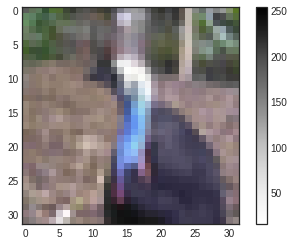

In [4]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.show()

In [5]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape((x_train.shape[0], 32 * 32 * 3))
x_val = x_val.reshape((x_val.shape[0], 32 * 32 * 3))
x_test = x_test.reshape((x_test.shape[0], 32 * 32 * 3))

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [7]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [8]:
# 모델 구성
inputs = Input(shape=(3072,))
x = layers.Dense(64, activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

# 모델 인스턴스 생성
model = models.Model(inputs=inputs, outputs=outputs)

# 모델 컴파일
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 64)                196672    
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0     

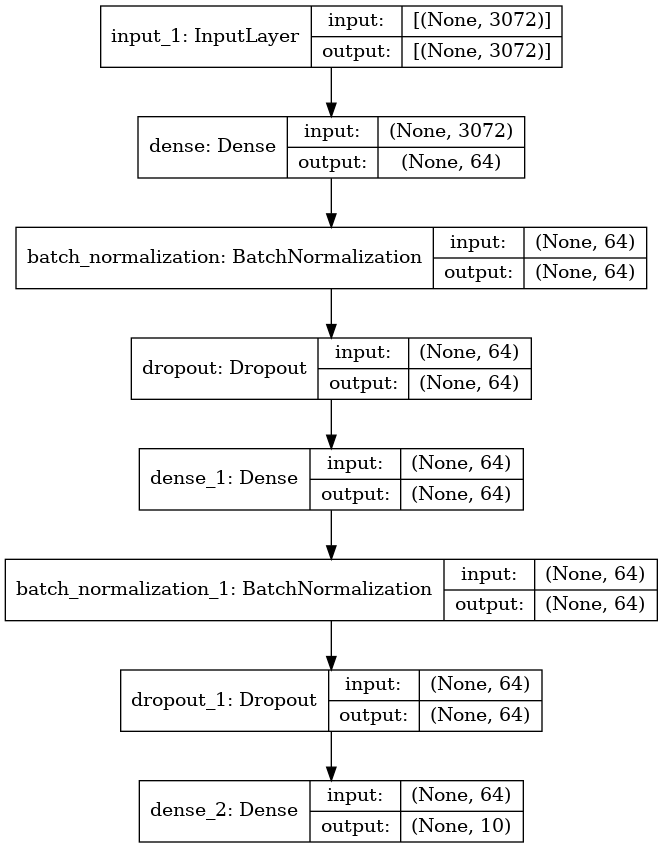

In [10]:
utils.plot_model(model, show_shapes=True)

In [11]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint("best_model.h5", save_best_only=True)
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/50
1250/1250 [==============================] - 19s 4ms/step - loss: 2.2389 - accuracy: 0.2196 - val_loss: 1.8854 - val_accuracy: 0.3144
Epoch 2/50
1250/1250 [==============================] - 5s 4ms/step - loss: 2.0039 - accuracy: 0.2511 - val_loss: 1.9427 - val_accuracy: 0.3035
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9923 - accuracy: 0.2624 - val_loss: 1.9185 - val_accuracy: 0.3084
Epoch 4/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9936 - accuracy: 0.2546 - val_loss: 1.9492 - val_accuracy: 0.2939
Epoch 5/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9885 - accuracy: 0.2545 - val_loss: 1.8625 - val_accuracy: 0.3257
Epoch 6/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9805 - accuracy: 0.2578 - val_loss: 1.8902 - val_accuracy: 0.3220
Epoch 7/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9767 - accuracy: 0.2611 - val_loss: 1.8724 - val_accuracy

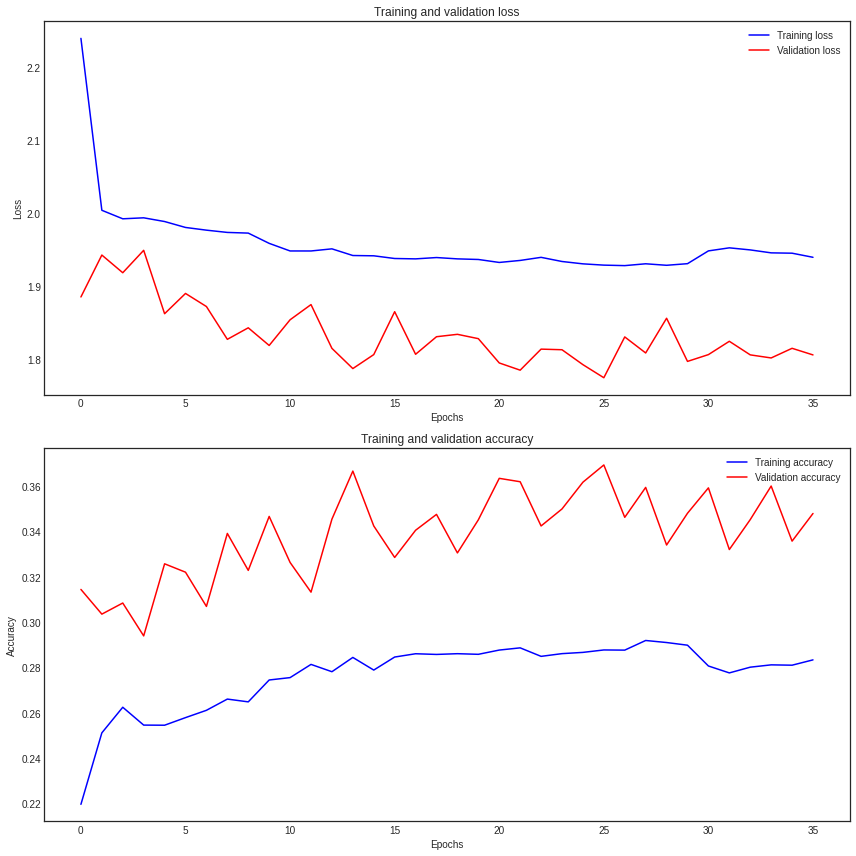

In [12]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.

# 학습 히스토리 시각화
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# 손실 그래프
ax1.plot(history.history['loss'], color='b', label='Training loss')
ax1.plot(history.history['val_loss'], color='r', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# 정확도 그래프
ax2.plot(history.history['accuracy'], color='b', label='Training accuracy')
ax2.plot(history.history['val_accuracy'], color='r', label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()


In [13]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.7783 - accuracy: 0.3713


[1.7782824039459229, 0.37130001187324524]